<a href="https://colab.research.google.com/github/Haffizuddin7899/Kaggle_House_Price_Prediction/blob/main/Kaggle_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Step 1: Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 2: Load data
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 306 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(268)
memory usage: 815.7 KB


In [11]:
train_data.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,...,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,...,0,0,0,1,0,0,0,0,1,0
7,8,60,0.0,10382,7,6,1973,1973,240.0,859,...,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,...,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,...,0,0,0,1,0,0,0,0,1,0


In [12]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
train_data.shape

(1460, 306)

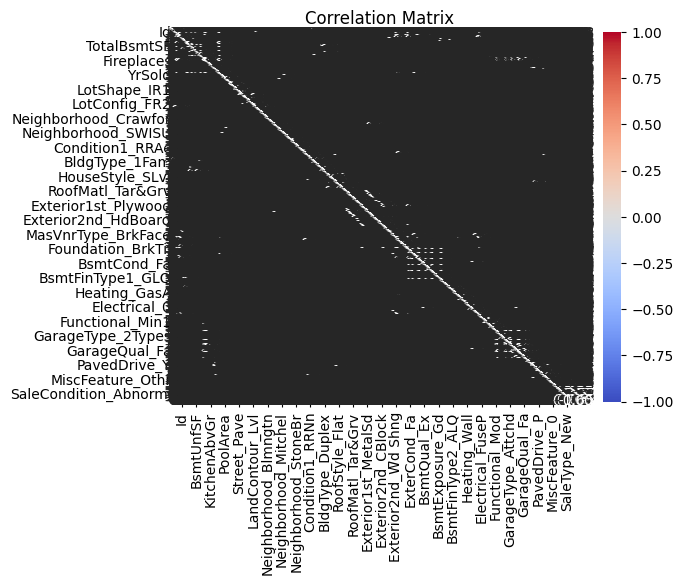

In [20]:
# Step 4: Correlation matrix
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

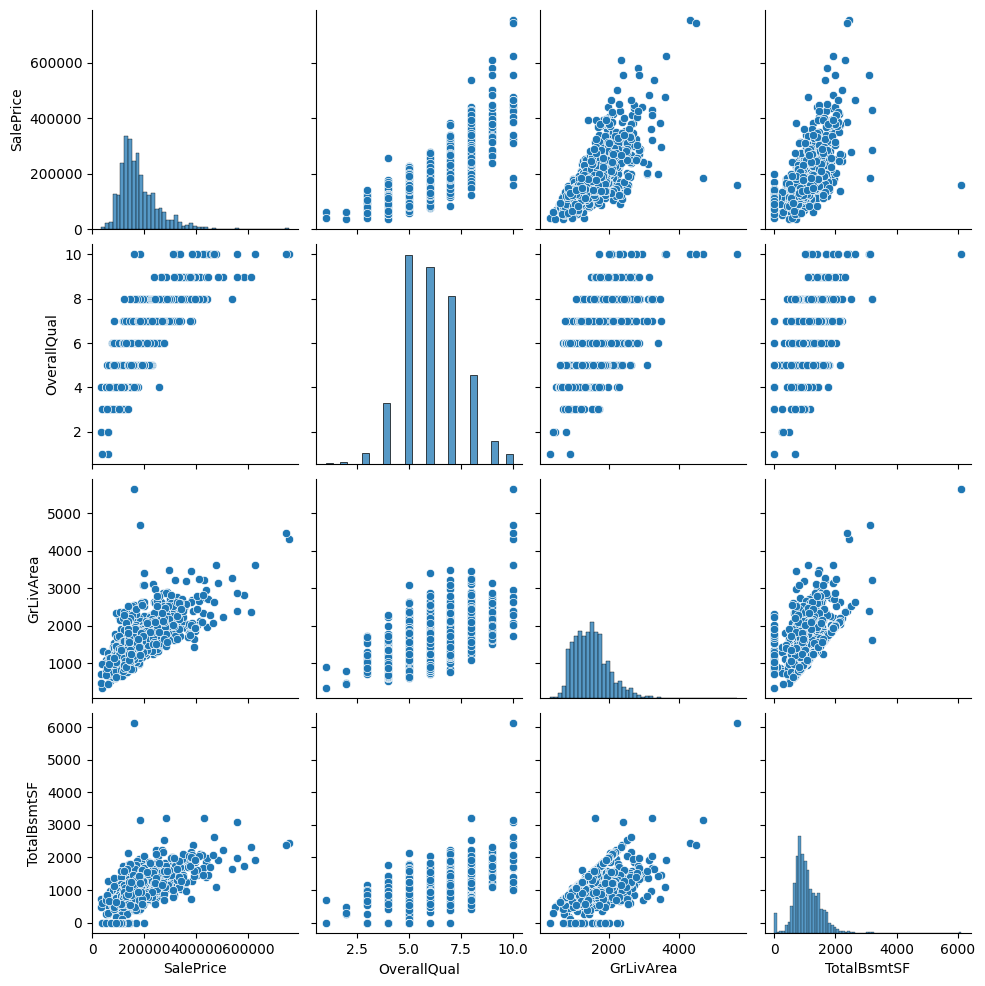

In [21]:
# Step 5: Pairplot for selected features (you can adjust features based on your interest)
sns.pairplot(train_data[['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF']])
plt.show()

In [23]:
# Qualitative EDA
# Step 6: Countplot for categorical variables
categorical_columns = train_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data[column])
    plt.title(f'Countplot for {column}')
    plt.show()

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 306 entries, Id to SaleCondition_Partial
dtypes: float64(11), int64(46), uint8(249)
memory usage: 1004.6 KB


In [16]:
test_data.head(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,0,0,0,1,0,0,0,0,1,0
5,1466,60,75.0,10000,6,5,1993,1994,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
6,1467,20,0.0,7980,6,7,1992,2007,0.0,935.0,...,0,0,0,1,0,0,0,0,1,0
7,1468,60,63.0,8402,6,5,1998,1998,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
8,1469,20,85.0,10176,7,5,1990,1990,0.0,637.0,...,0,0,0,1,0,0,0,0,1,0
9,1470,20,70.0,8400,4,5,1970,1970,0.0,804.0,...,0,0,0,1,0,0,0,0,1,0


In [17]:
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,57.910212,9819.161069,6.078821,5.553804,1971.357779,1983.662783,99.673749,438.902673,...,0.002056,0.080192,0.002742,0.862234,0.061001,0.005483,0.008225,0.017820,0.825223,0.082248
std,421.321334,42.746880,32.266054,4955.517327,1.436812,1.113740,30.390071,21.130467,177.001792,455.257119,...,0.045314,0.271683,0.052306,0.344772,0.239414,0.073871,0.090348,0.132344,0.379907,0.274837
min,1461.000000,20.000000,0.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1825.500000,20.000000,44.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2190.000000,50.000000,63.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,2554.500000,70.000000,78.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,162.000000,752.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
test_data.shape

(1459, 306)

In [26]:
# Step 3: Preprocessing
# Assuming you have features and target variable defined based on the provided data description

# Handling missing values
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

In [27]:
# Encode categorical variables (if any)
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)

In [28]:
# Align test set with training set columns
test_data = test_data.reindex(columns=train_data.columns, fill_value=0)


In [29]:
# Ensure the target variable 'SalePrice' is not in the test data
test_data.drop('SalePrice', axis=1, inplace=True)


In [30]:
# Separate features and target variable
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

In [31]:
# Step 4: Model according to documents
model = RandomForestRegressor(random_state=42)

In [32]:
# Step 5: Train the model
model.fit(X, y)

RandomForestRegressor(random_state=42)

In [33]:
# Step 6: Test the model on test data
# Assuming you have test features stored in a variable 'test_features'
predictions = model.predict(test_data)

In [38]:
print(len(true_values_train), len(predictions))


1460 1459


In [39]:
# Remove the last row from true_values_train
true_values_train = true_values_train[:-1]

# Now check the lengths again
print(len(true_values_train), len(predictions))


1459 1459


In [43]:
# Step 7: Calculate the desired metric (Root-Mean-Squared-Error)
# Extract the true SalePrice values from the training set
true_values_train = train_data['SalePrice'].values
# Exclude the last row from true_values_train
true_values_train = true_values_train[:-1]

# Use the corrected lengths to calculate the RMSE
rmse = np.sqrt(mean_squared_error(true_values_train, predictions))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 107631.95296686243


In [35]:
# Step 8: Create the submission file in the desired format
submission_df = pd.DataFrame({'Id': test_data['Id'], 'SalePrice': predictions})
submission_df.to_csv('submission.csv', index=False)